In [4]:
from sklearn import datasets
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler

from FFNN import FFNN

In [5]:
iris = datasets.load_iris()
X = iris.data
y = iris.target

scaler = MinMaxScaler()
X = scaler.fit_transform(X)

y_one_hot = [[1 if i == label else 0 for i in range(3)] for label in y]

# 70% training - 15% validation - 15% testing
X_train, X_temp, y_train, y_temp = train_test_split(X, y_one_hot, test_size=0.3, random_state=42)
X_val, X_test, y_val, y_test = train_test_split(X_temp, y_temp, test_size=0.5, random_state=42)


In [6]:
ffnn = FFNN(
        input_size=4,
        hidden_sizes=[5, 5],
        output_size=3,
        learning_rate=0.1,
        hidden_activations=['relu', 'relu'],
        output_activation='sigmoid', 
        loss_function='mse',      
        reg_type='l1',
        reg_lambda=0.001,
        rms_norm=True    
    )
ffnn.train(X_train, y_train, X_val, y_val, epochs=20, batch_size=1, verbose=1)

correct = 0
for inputs, target in zip(X_test, y_test):
    prediction = ffnn.predict(inputs)
    predicted_class = prediction.index(max(prediction))
    actual_class = target.index(max(target))
    if predicted_class == actual_class:
        correct += 1

print(f"Akurasi: {correct / len(y_test) * 100:.2f}%")

Epoch 1/20: 100%|███████████████████████████████| 


Train Loss: 0.1992 - Val Loss: 0.0715


Epoch 2/20: 100%|███████████████████████████████| 


Train Loss: 0.1463 - Val Loss: 0.0638


Epoch 3/20: 100%|███████████████████████████████| 


Train Loss: 0.1269 - Val Loss: 0.0476


Epoch 4/20: 100%|███████████████████████████████| 


Train Loss: 0.1018 - Val Loss: 0.0362


Epoch 5/20: 100%|███████████████████████████████| 


Train Loss: 0.0865 - Val Loss: 0.0297


Epoch 6/20: 100%|███████████████████████████████| 


Train Loss: 0.0811 - Val Loss: 0.0279


Epoch 7/20: 100%|███████████████████████████████| 


Train Loss: 0.0793 - Val Loss: 0.0277


Epoch 8/20: 100%|███████████████████████████████| 


Train Loss: 0.0805 - Val Loss: 0.0253


Epoch 9/20: 100%|███████████████████████████████| 


Train Loss: 0.0791 - Val Loss: 0.0300


Epoch 10/20: 100%|██████████████████████████████| 


Train Loss: 0.0734 - Val Loss: 0.0315


Epoch 11/20: 100%|██████████████████████████████| 


Train Loss: 0.0728 - Val Loss: 0.0307


Epoch 12/20: 100%|██████████████████████████████| 


Train Loss: 0.0724 - Val Loss: 0.0293


Epoch 13/20: 100%|██████████████████████████████| 


Train Loss: 0.0721 - Val Loss: 0.0286


Epoch 14/20: 100%|██████████████████████████████| 


Train Loss: 0.0715 - Val Loss: 0.0282


Epoch 15/20: 100%|██████████████████████████████| 


Train Loss: 0.0707 - Val Loss: 0.0274


Epoch 16/20: 100%|██████████████████████████████| 


Train Loss: 0.0706 - Val Loss: 0.0269


Epoch 17/20: 100%|██████████████████████████████| 


Train Loss: 0.0707 - Val Loss: 0.0269


Epoch 18/20: 100%|██████████████████████████████| 


Train Loss: 0.0701 - Val Loss: 0.0267


Epoch 19/20: 100%|██████████████████████████████| 


Train Loss: 0.0693 - Val Loss: 0.0272


Epoch 20/20: 100%|██████████████████████████████| 


Train Loss: 0.0685 - Val Loss: 0.0271
Akurasi: 91.30%


In [7]:
ffnn.compare_lib(X_train, y_train, X_test, y_test)

Accuracy FFNN: 91.30%
Accuracy MLP Sklearn: 100.00%


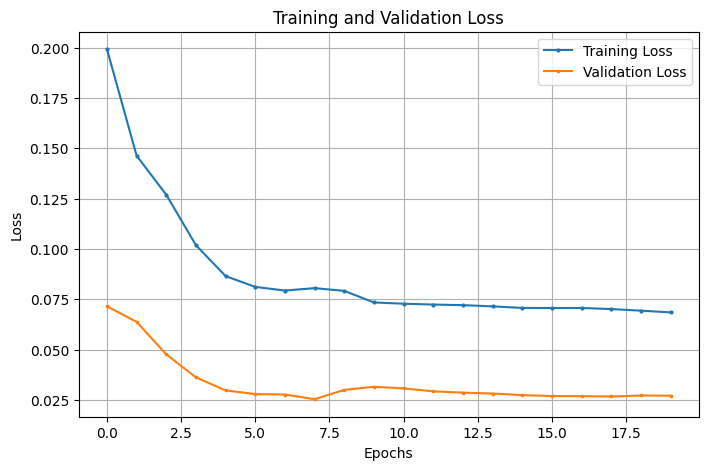

In [8]:
ffnn.plot_training_history()

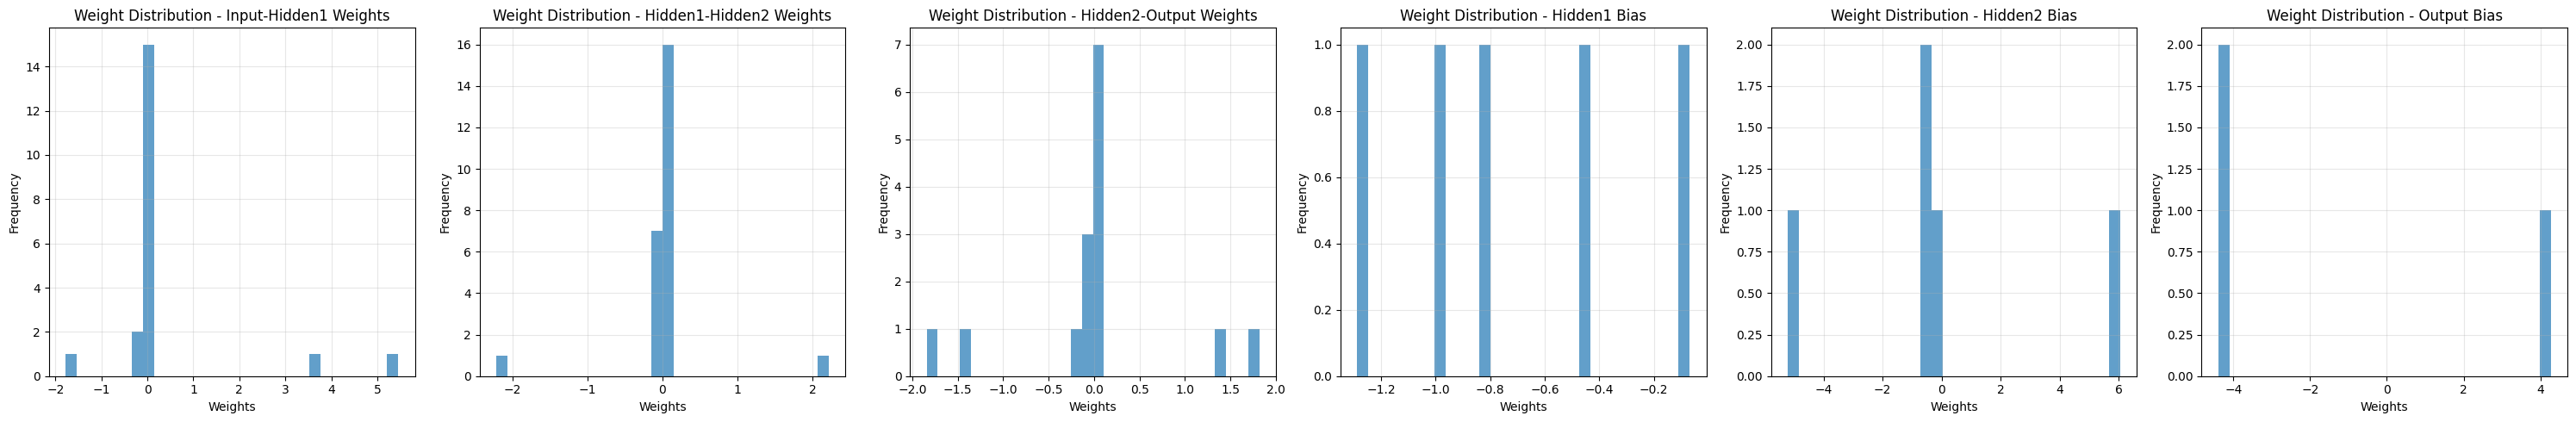

In [9]:
ffnn.plot_weight_distributions()

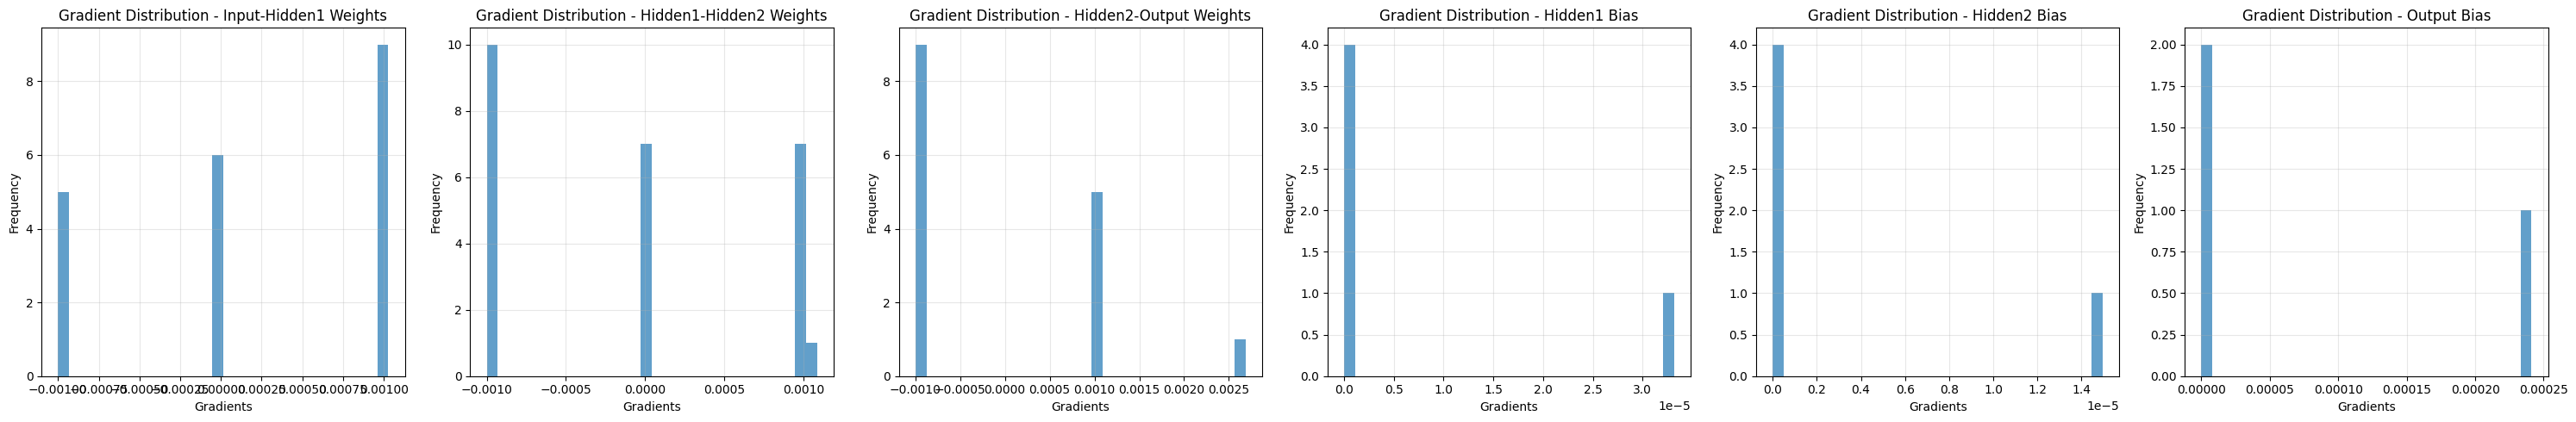

In [10]:
ffnn.plot_gradient_distributions()

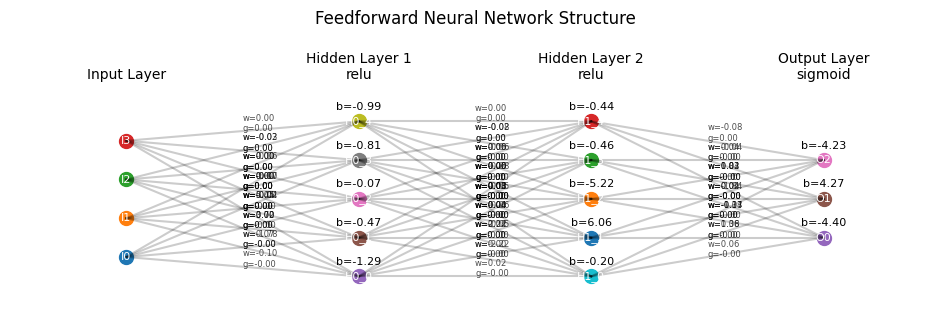

In [11]:
ffnn.visualize_network()